In [1]:
import numpy as np
import pandas as pd

## 1. Data Wrangling

In [2]:
df = pd.read_csv('events_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Event_ID           10000 non-null  int64 
 1   Event_Name         10000 non-null  object
 2   Event_Type         10000 non-null  object
 3   Event_Date         10000 non-null  object
 4   Location           10000 non-null  object
 5   Ticket_Price       10000 non-null  int64 
 6   Weather_Condition  10000 non-null  object
 7   Attendance_Count   10000 non-null  int64 
 8   Day_of_Week        10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.3+ KB


In [3]:
df.drop(['Event_ID', 'Event_Name'], axis=1, inplace=True)

In [4]:
df.head()

,Event_Type,Event_Date,Location,Ticket_Price,Weather_Condition,Attendance_Count,Day_of_Week
0,Conference,2024-02-24,C,48,Rainy,76,Saturday
1,Concert,2022-01-02,A,73,Cloudy,206,Sunday
2,Expo,2023-10-28,B,46,Cloudy,297,Saturday
3,Conference,2023-03-19,E,22,Sunny,354,Sunday
4,Concert,2022-04-29,E,72,Rainy,330,Friday


In [5]:
# date is in YYYY-MM-DD format extract month from it
df['Month'] = pd.DatetimeIndex(df['Event_Date']).month
df.drop(['Event_Date'], axis=1, inplace=True)

In [6]:
df.head()

,Event_Type,Location,Ticket_Price,Weather_Condition,Attendance_Count,Day_of_Week,Month
0,Conference,C,48,Rainy,76,Saturday,2
1,Concert,A,73,Cloudy,206,Sunday,1
2,Expo,B,46,Cloudy,297,Saturday,10
3,Conference,E,22,Sunny,354,Sunday,3
4,Concert,E,72,Rainy,330,Friday,4


In [7]:
event_type = {'Concert':0, 'Conference':1, 'Expo':2, 'Workshop':3}
df['Event_Type'] = df['Event_Type'].map(event_type)
location = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}
day_of_week = {'Sunday':2, 'Monday':3, 'Tuesday':4, 'Wednesday':5, 'Thursday':6, 'Friday':0, 'Saturday':1}
df['Location'] = df['Location'].map(location)
df['Day_of_Week'] = df['Day_of_Week'].map(day_of_week)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather_Condition'] = le.fit_transform(df['Weather_Condition'])

In [9]:
le.classes_

array(['Cloudy', 'Rainy', 'Sunny'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Event_Type         10000 non-null  int64
 1   Location           10000 non-null  int64
 2   Ticket_Price       10000 non-null  int64
 3   Weather_Condition  10000 non-null  int32
 4   Attendance_Count   10000 non-null  int64
 5   Day_of_Week        10000 non-null  int64
 6   Month              10000 non-null  int32
dtypes: int32(2), int64(5)
memory usage: 468.9 KB


In [11]:
df.columns

Index(['Event_Type', 'Location', 'Ticket_Price', 'Weather_Condition',
       'Attendance_Count', 'Day_of_Week', 'Month'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['Attendance_Count'], axis=1)
y = df['Attendance_Count']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

## 2. Modeling

### 2.1. Neural Network

In [13]:
# create a simple neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

tf.random.set_seed(40)

model = Sequential([
    Dense(50, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,951
Trainable params: 2,951
Non-trainable params: 0
_________________________________________________________________


In [14]:
hist = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_cv, y_cv))

Epoch 1/15
250/250 [==============================] - 2s 3ms/step - loss: 74462.3672 - mean_squared_error: 74462.3672 - val_loss: 36315.8516 - val_mean_squared_error: 36315.8516
Epoch 2/15
250/250 [==============================] - 0s 2ms/step - loss: 22063.1855 - mean_squared_error: 22063.1855 - val_loss: 17578.2988 - val_mean_squared_error: 17578.2988
Epoch 3/15
250/250 [==============================] - 0s 2ms/step - loss: 19560.6543 - mean_squared_error: 19560.6543 - val_loss: 17357.0664 - val_mean_squared_error: 17357.0664
Epoch 4/15
250/250 [==============================] - 0s 2ms/step - loss: 19072.1777 - mean_squared_error: 19072.1777 - val_loss: 17285.3867 - val_mean_squared_error: 17285.3867
Epoch 5/15
250/250 [==============================] - 0s 2ms/step - loss: 19022.8691 - mean_squared_error: 19022.8691 - val_loss: 17195.5918 - val_mean_squared_error: 17195.5918
Epoch 6/15
250/250 [==============================] - 1s 2ms/step - loss: 18948.2051 - mean_squared_error: 189

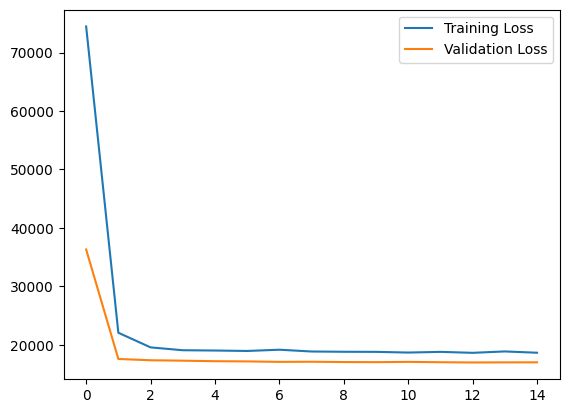

In [15]:
# plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### 2.2. Linear Regression

In [16]:
# create a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(40)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# check on cv set
y_pred = lr.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16914.7221810596


### 2.3. Random Forest Regression

In [19]:
from sklearn.model_selection import GridSearchCV

# import regression models
from sklearn.ensemble import RandomForestRegressor

np.random.seed(40)

# create random forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [20]:
# perform gridsearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [21]:
# check on cv set
y_pred = grid_search.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 17401.100052042875


### 2.4. Gradient Boosting Regression

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(40)

# create gradient boosting model
gb = GradientBoostingRegressor(n_estimators=100, max_depth=10)

gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10)

In [23]:
# perform gridsearch for best hyperparameters
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

gs = GridSearchCV(gb, params, cv=3, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(max_depth=10), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [24]:
# check on cv set

y_pred = gs.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 17522.278897181914


In [25]:
from catboost import CatBoostRegressor

np.random.seed(40)

# create catboost model
cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=2)

cb.fit(X_train, y_train)

0:	learn: 130.6682974	total: 148ms	remaining: 148ms
1:	learn: 130.6493282	total: 150ms	remaining: 0us


In [26]:
# check on cv set
y_pred = cb.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 16922.956133317348


The best model according to the cross validation error is `LinearRegression()`.

In [27]:
# Final test error
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression Mean Squared Error:', mse)

Linear Regression Mean Squared Error: 17019.798140503153


Why is linear regression performing the best though? This is due to the fact that our data is synthetic. It is randomly generated and does not follow a trend. If we plot a scatter plot of our data we get a rectangle. And what represents a rectangle best in a single line? Its diagonal. And that is what our model at the end emualates.

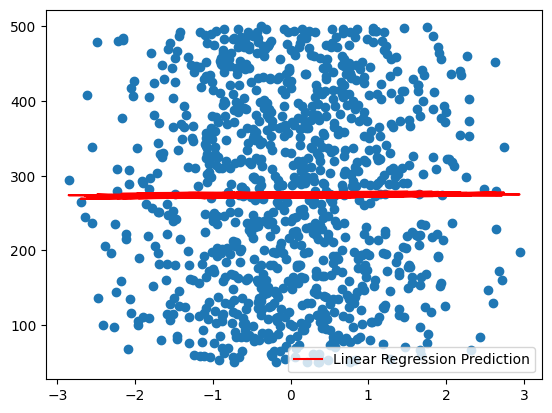

In [28]:
# use pca to plot test data along with the predictions
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca, y_test)
plt.plot(X_pca, y_pred, color='red', label='Linear Regression Prediction')
plt.legend()

plt.show()


In [29]:
# Perform hyperparameter tuning on linear regression
from sklearn.model_selection import GridSearchCV

params = {
    'fit_intercept': [True, False]
}

lr = LinearRegression()

grid = GridSearchCV(lr, params, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [30]:
# check cv score and test score

print('Best Parameters:', grid.best_params_)

y_pred = grid.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
print('Mean Squared Error CV:', mse)

y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error Test:', mse)

Best Parameters: {'fit_intercept': True}
Mean Squared Error CV: 16914.7221810596
Mean Squared Error Test: 17019.798140503153


### Regularizing the model

In [31]:
# regularization
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

np.random.seed(40)

params = {'alpha':[0.1, 0.5, 1, 5, 10, 50, 100]}

ridge = Ridge(alpha=0.5)

rgs = GridSearchCV(ridge, params, cv=5)

rgs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.5),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]})

In [32]:
# check on cv set
y_pred = rgs.predict(X_cv)
mse = mean_squared_error(y_cv, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 16914.53227243664


In [33]:
rgs.best_params_

{'alpha': 100}

In [34]:
# create final model with best params
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [35]:
# save the model
import joblib

joblib.dump(ridge, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [36]:
df.to_csv('events_dataset_numerical.csv', index=False)

In [37]:
# save the scaler
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']